# KMeans Clustering

In [97]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [98]:
data = pd.read_excel("segment.xlsx", sheet_name="Data")

In [99]:
data.head()

,Names,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,Allen,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,Anderson,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,Bailey,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Baker,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Names   100 non-null    object
 1   1       100 non-null    int64 
 2   2       100 non-null    int64 
 3   3       100 non-null    int64 
 4   4       100 non-null    int64 
 5   5       100 non-null    int64 
 6   6       100 non-null    int64 
 7   7       100 non-null    int64 
 8   8       100 non-null    int64 
 9   9       100 non-null    int64 
 10  10      100 non-null    int64 
 11  11      100 non-null    int64 
 12  12      100 non-null    int64 
 13  13      100 non-null    int64 
 14  14      100 non-null    int64 
 15  15      100 non-null    int64 
 16  16      100 non-null    int64 
 17  17      100 non-null    int64 
 18  18      100 non-null    int64 
 19  19      100 non-null    int64 
 20  20      100 non-null    int64 
 21  21      100 non-null    int64 
 22  22      100 non-null    int

In [101]:
#check for NAs
data.isna().sum().sum()

0

## K-Means

In [102]:
# initialize the number of clusters as an argument to KMeans function which is chosen intuitively
cluster = KMeans(n_clusters=4, random_state=42)

In [103]:
# prepare dataset for the algorithm (i.e. get rid of the very first column with names 
# because it works only with the numeric data)
Train = data.iloc[:,1:]

In [104]:
# predict clusters and save them in our dataframe as one last additional column
# scale data if needed 
data["cluster"] = cluster.fit_predict(Train)

In [105]:
data.head()

,Names,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,cluster
0,Adams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,3
1,Allen,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,2
2,Anderson,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,Bailey,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,3
4,Baker,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,2


### Elbow Method

In [106]:
sse = {}
for k in range(1,10):
    cluster_wine = KMeans(n_clusters=k, random_state=42)
    data['cluster_wine']=cluster_wine.fit_predict(Train)
    sse[k] = cluster_wine.inertia_ 
#Sum of squared distances of samples to their closest cluster center, other measures of distances can also be taken

In [107]:
sse

{1: 281.90000000000003,
 2: 251.46031746031747,
 3: 227.90824468085103,
 4: 213.48264492753634,
 5: 204.08253878474477,
 6: 195.64873144399456,
 7: 186.50474525474527,
 8: 180.95398098633387,
 9: 172.55537795537793}

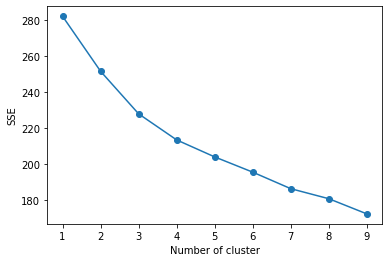

In [108]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker="o") #sse is dictionary 
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

From the graph it is difficult to decide whether the optimal number for the clusters is 3 or 4, so lets run Silhouette score for further analysis.

### Silhouette score method

Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b)



In [114]:
sil_coef={}
for k in range (2,8): 
    cluster_wine=KMeans(n_clusters=k, random_state=42)
    data['cluster_wine']=cluster_wine.fit_predict(Train)
    sil_coef[k]=silhouette_score(Train,cluster_wine.labels_,metric='euclidean')

In [115]:
sil_coef

{2: 0.09174871508750351,
 3: 0.12122715317053197,
 4: 0.11789796273719859,
 5: 0.11166629295035457,
 6: 0.10919252034158575,
 7: 0.119528131019189}

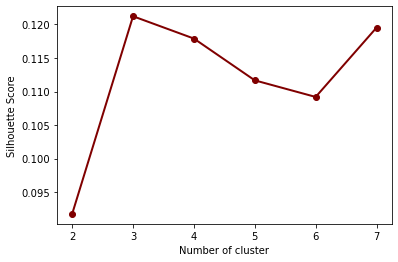

In [116]:
plt.figure()
plt.plot(list(sil_coef.keys()), list(sil_coef.values()), color='maroon', linewidth=2, marker='o')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

From the graph we can see that 3 has higher coef than 4 so it is more optimal

In [112]:
#Let's use the optimal value of k from silhouette score method as it gave better results
cluster= KMeans(n_clusters=3, random_state=42).fit_predict(Train)
cluster

array([0, 2, 1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 2, 2, 1, 2, 1, 0, 2, 0, 0,
       2, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2], dtype=int32)

In [113]:
# quickly count the number of customers in each cluster
data["cluster"] = cluster
data["cluster"].value_counts()

2    47
0    37
1    16
Name: cluster, dtype: int64